<a href="https://colab.research.google.com/github/Daniel-ASG/Daniel-ASG/blob/main/analise_de_dados_Artigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Questões para serem respondidas!

Observar os efeitos daa introdução da carpa nas variáveis resposta:
* totIND - Total de indivíduos (abundância)
* ricTAXA - Riqueza de espécies
* DIV - Diversidade de espécies
* EQ - Equitabilidade
* DOM - Dominância de espécies

Verificar se alguma outra variável provoca efeito nas respostas

aplicar teste t para:
- antes e depois da carpa
- estação de seca e de chuva


Algumas ideias:
1. Verificar se a sazonalidade provoca algum efeito nas respostas
2. Criar um modelo de previsão das resposta com base nos parâmetros de entrada
3. O modelo pode servir até para preencher os dados com "inf" na variável "EQ"
3. Agregar os dados por pontos (IMPORTANTE)
3. Agregar por mês




In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
dados = pd.read_csv('/content/drive/MyDrive/Analise_de_dados/dados_R.csv')
dados.drop([0,1,2], inplace=True)
dados.drop(dados.query('Alc == "-"').index, inplace=True)
dados.reset_index(drop=True, inplace=True)
dados.head()

,Seasons,YEAR,MONTH,Datas,POINT,categoria,Replication,Npoints,TimeOrderPluv,Order,carpa,pH,Temp,OD,CE,Alc,DuTot,MO,Pluvio,totIND,ricTAXA,DIV,EQ,DOM
0,dry,2002,aug,Aug-02,P1,2002augP1,R1,1,4,1,no,9.8,27,8.6,30,15,60,11.4,18.8,429,11,1.0039609,0.4186842,0.5957245
1,dry,2002,aug,Aug-02,P1,2002augP1,R2,2,4,1,no,9.3,27,8.1,35.2,15,60,12.1,18.8,366,11,1.0248998,0.4274164,0.5868701
2,dry,2002,aug,Aug-02,P1,2002augP1,R3,3,4,1,no,9.8,27.2,8.2,32,15,60,12.5,18.8,123,11,1.4919197,0.6221788,0.3842492
3,dry,2002,aug,Aug-02,P2,2002augP2,R1,4,4,1,no,9,27.2,8.4,32.4,15,60,41.2,18.8,489,16,1.4553052,0.5248904,0.4175542
4,dry,2002,aug,Aug-02,P2,2002augP2,R2,5,4,1,no,8.8,27.2,8.4,30,15,60,40.2,18.8,411,13,1.5932532,0.6211636,0.3654311


In [33]:
#@title
dados.Datas = pd.to_datetime(dados.Datas, format='%b-%y').map(lambda x: x.strftime('%b-%y'))
# dados.Datas = dados.Datas.map(lambda x: x.strftime('%b-%y'))

dados.Order = dados.Order.astype(int)
dados.pH = dados.pH.astype(float)
dados.Temp = dados.Temp.astype(float)
dados.OD = dados.OD.astype(float)
dados.CE = dados.CE.astype(float)
dados.Alc = dados.Alc.astype(float)
dados.DuTot = dados.DuTot.astype(int)
dados.MO = dados.MO.astype(float)
dados.Pluvio = dados.Pluvio.astype(float)
dados.totIND = dados.totIND.astype(int)
dados.ricTAXA = dados.ricTAXA.astype(int)
dados.DIV = dados.DIV.astype(float)

dados.EQ = dados.EQ.astype(float)
dados.EQ = dados.EQ.replace(np.inf, np.nan)

dados.DOM = dados.DOM.astype(float)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Seasons        273 non-null    object 
 1   YEAR           273 non-null    int64  
 2   MONTH          273 non-null    object 
 3   Datas          273 non-null    object 
 4   POINT          273 non-null    object 
 5   categoria      273 non-null    object 
 6   Replication    273 non-null    object 
 7   Npoints        273 non-null    int64  
 8   TimeOrderPluv  273 non-null    int64  
 9   Order          273 non-null    int64  
 10  carpa          273 non-null    object 
 11  pH             273 non-null    float64
 12  Temp           273 non-null    float64
 13  OD             273 non-null    float64
 14  CE             273 non-null    float64
 15  Alc            273 non-null    float64
 16  DuTot          273 non-null    int64  
 17  MO             273 non-null    float64
 18  Pluvio    

In [34]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,273.0,2004.846154,1.769366,2002.000000,2003.000000,2005.000000,2006.000000,2008.000000
Npoints,273.0,4.967033,2.592908,1.000000,3.000000,5.000000,7.000000,9.000000
TimeOrderPluv,273.0,19.813187,9.774192,4.000000,11.000000,19.000000,29.000000,36.000000
Order,273.0,16.813187,9.774192,1.000000,8.000000,16.000000,26.000000,33.000000
pH,273.0,7.521319,0.821826,6.200000,6.800000,7.500000,8.000000,9.800000
Temp,273.0,28.104029,1.728530,24.600000,26.900000,28.300000,29.400000,31.600000
OD,273.0,6.694469,2.093561,2.000000,5.000000,7.000000,8.200000,12.000000
CE,273.0,289.640659,256.993330,30.000000,136.800000,203.700000,305.000000,1197.000000
Alc,273.0,24.286813,14.259433,5.000000,15.000000,19.000000,30.000000,73.000000
DuTot,273.0,60.860806,21.213612,12.000000,45.000000,59.000000,73.000000,130.000000


In [35]:
table = pd.pivot_table(dados, index=['carpa', 'Seasons'], aggfunc=np.mean)
table

Alc          CE       DIV  ...        pH    ricTAXA      totIND
carpa Seasons                                   ...                                 
no    dry      17.894737  160.971930  1.505385  ...  8.023333  11.438596  297.210526
      rainy    16.777778  150.012963  1.553361  ...  6.907222  11.129630  372.851852
yes   dry      25.114815  256.833333  1.192604  ...  7.429630   5.246914  112.197531
      rainy    32.962963  506.077778  1.052358  ...  7.669136   4.333333  204.148148

[4 rows x 17 columns]

In [36]:
table = pd.pivot_table(dados, index=['Seasons', 'carpa'], aggfunc=np.mean)
table

Alc          CE       DIV  ...        pH    ricTAXA      totIND
Seasons carpa                                   ...                                 
dry     no     17.894737  160.971930  1.505385  ...  8.023333  11.438596  297.210526
        yes    25.114815  256.833333  1.192604  ...  7.429630   5.246914  112.197531
rainy   no     16.777778  150.012963  1.553361  ...  6.907222  11.129630  372.851852
        yes    32.962963  506.077778  1.052358  ...  7.669136   4.333333  204.148148

[4 rows x 17 columns]

In [38]:
table = pd.pivot_table(dados, index=['Datas', 'POINT'], aggfunc=np.mean)
table

Alc          CE       DIV  ...        pH    ricTAXA       totIND
Datas  POINT                              ...                                  
Apr-03 P1     15.0  159.666667  1.731065  ...  7.833333  14.333333   235.333333
       P2     15.0  160.666667  1.734227  ...  7.733333  13.000000   228.666667
       P3     15.0  160.666667  1.769746  ...  7.666667  12.000000   175.666667
Apr-04 P1     14.0  138.500000  1.471005  ...  6.320000  12.000000  1014.666667
       P2     15.0  135.400000  1.621971  ...  6.416667  11.000000   299.333333
...            ...         ...       ...  ...       ...        ...          ...
Oct-06 P2     17.0  131.566667  1.440150  ...  7.800000  10.000000   124.000000
       P3     19.0  133.000000  1.265472  ...  6.900000   6.666667   100.000000
Oct-07 P1     41.0  274.866667  0.859018  ...  7.933333   3.666667   190.000000
       P2     45.0  282.033333  0.746540  ...  8.333333   2.000000   150.333333
       P3     31.0  276.866667  0.938733  ...  6.966667   2.666667    73.333333

[91 rows x 17 columns]

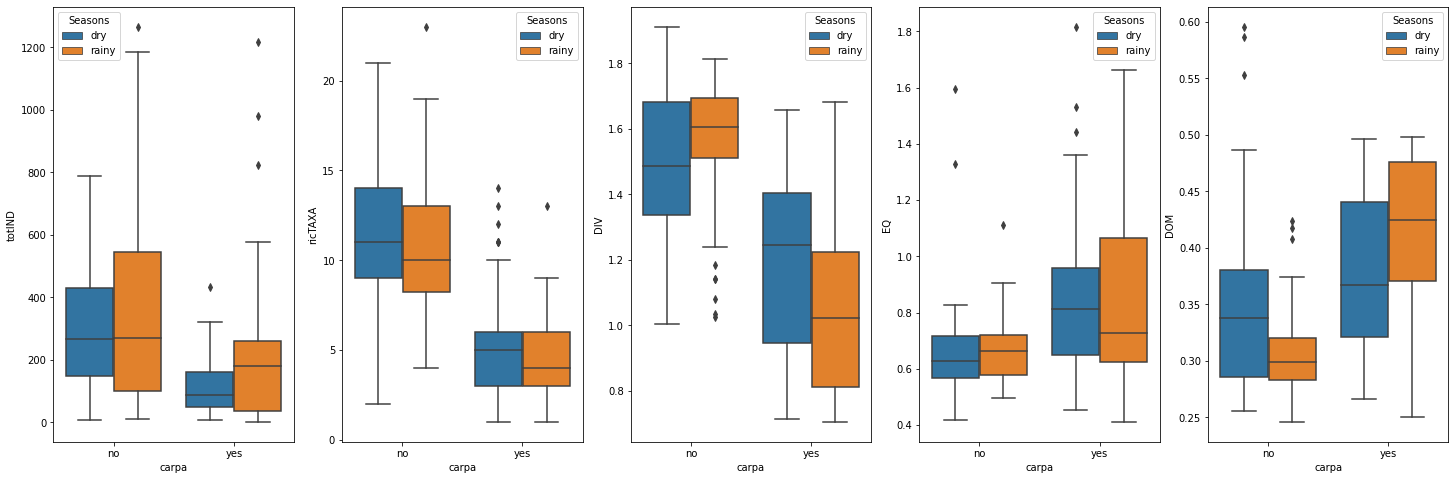

In [ ]:
#@title
fig, axes = plt.subplots(1,5, figsize=(25,8))
 
sns.boxplot(ax=axes[0], data=dados,  x="carpa", y='totIND', hue='Seasons')
sns.boxplot(ax=axes[1], data=dados,  x="carpa", y='ricTAXA', hue='Seasons')
sns.boxplot(ax=axes[2], data=dados,  x="carpa", y='DIV', hue='Seasons')
sns.boxplot(ax=axes[3], data=dados,  x="carpa", y='EQ', hue='Seasons')
sns.boxplot(ax=axes[4], data=dados,  x="carpa", y='DOM', hue='Seasons');

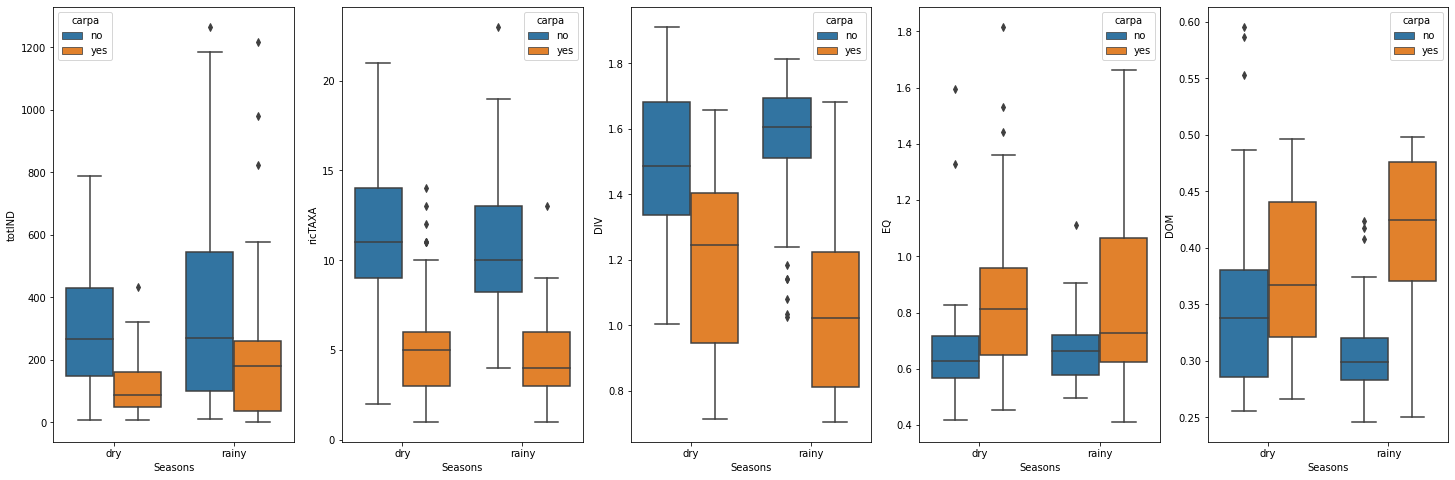

In [ ]:
#@title
fig, axes = plt.subplots(1,5, figsize=(25,8))
 
sns.boxplot(ax=axes[0], data=dados,  x="Seasons", y='totIND', hue='carpa')
sns.boxplot(ax=axes[1], data=dados,  x="Seasons", y='ricTAXA', hue='carpa')
sns.boxplot(ax=axes[2], data=dados,  x="Seasons", y='DIV', hue='carpa')
sns.boxplot(ax=axes[3], data=dados,  x="Seasons", y='EQ', hue='carpa')
sns.boxplot(ax=axes[4], data=dados,  x="Seasons", y='DOM', hue='carpa');

# Interferência da introdução da carpa no ambiente, observando as variáveis resposta:

* totIND
    * Após a introdução da carpa houve uma queda na quantidade total de indivíduos (abundância). 👇 
* ricTAXA -> Riqueza de espécies (refere-se a abundância numérica de uma determinada área geográfica, região ou comunidade)
    * A riqueza de espécies caiu mais da metade. 🤔 
* DIV - Diversidade de espécies (número de diferentes espécies que estão representadas numa dada comunidade)
    * A diversidade também diminuiu com a introdução da carpa. 👎 
* EQ - Equitabilidade (padrão de distribuição de indivíduos entre as espécies, sendo proporcional a diversidade, exceto se houver co-dominância de uma espécie). Quanto mais homogêneo for o número de indivíduos por espécie, maior a equitabilidade, a uniformidade.
    * Com a introdução da carpa a equitabilidade aumentou, tornando a comunidade mais homogênea. 😒 
* DOM - Dominância de espécies (refere-se a dominância de uma ou mais espécies numa determinada comunidade, habitat ou região). Quanto mais alto for, maior a probabilidade de os indivíduos serem da mesma espécie, ou seja, maior a dominância e menor a diversidade ( Índice de Simpson)<sup> [[1]](https://www.scielo.br/pdf/ne/v34n1/23382.pdf)</sup>.
    * É perceptível que o nível de dominância se elevou depois que a carpa foi introduzida no ambiente. 😉 

In [ ]:
#@title
dados_sem_carpa = dados.query("Datas == ['Aug-02', 'Oct-02', 'Dec-02', 'Feb-03', 'Apr-03', 'Jun-03', 'Aug-03', 'Oct-03', 'Dec-03', 'Feb-04', 'Apr-04', 'Jun-04', 'Aug-04']")
dados_com_carpa = dados.query("Datas == ['Dec-04', 'Feb-05', 'Apr-05', 'Jun-05', 'Aug-05', 'Oct-05', 'Dec-05', 'Feb-06', 'Aug-06', 'Oct-06', 'Dec-06', 'Feb-07', 'Apr-07', 'Jun-07', 'Oct-07', 'Dec-07', 'Feb-08', 'Apr-08']")

def graf_resp_data(var_resposta):
    fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 1.5]}, sharey=True)
    plt.subplots_adjust(wspace=0)
    fig.suptitle(f'{var_resposta}    x    Datas das coletas', fontsize=25)

    sns.stripplot(data=dados_sem_carpa, x='Datas', y=var_resposta, hue='Seasons', palette="Dark2_r", ax=ax[0])
    ax[0].set_title('Sem Carpa', fontsize=10)
    ax[0].set_xlabel('')
    ax[0].set_ylabel(var_resposta, fontsize=14)
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=60)

    sns.stripplot(data=dados_com_carpa, x='Datas', y=var_resposta, hue='Seasons', palette="Dark2_r", ax=ax[1])
    ax[1].set_title('Com Carpa', fontsize=10)
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=60)

    ax[1].figure.set_size_inches(25,6) # configura o tamanho do gráfico

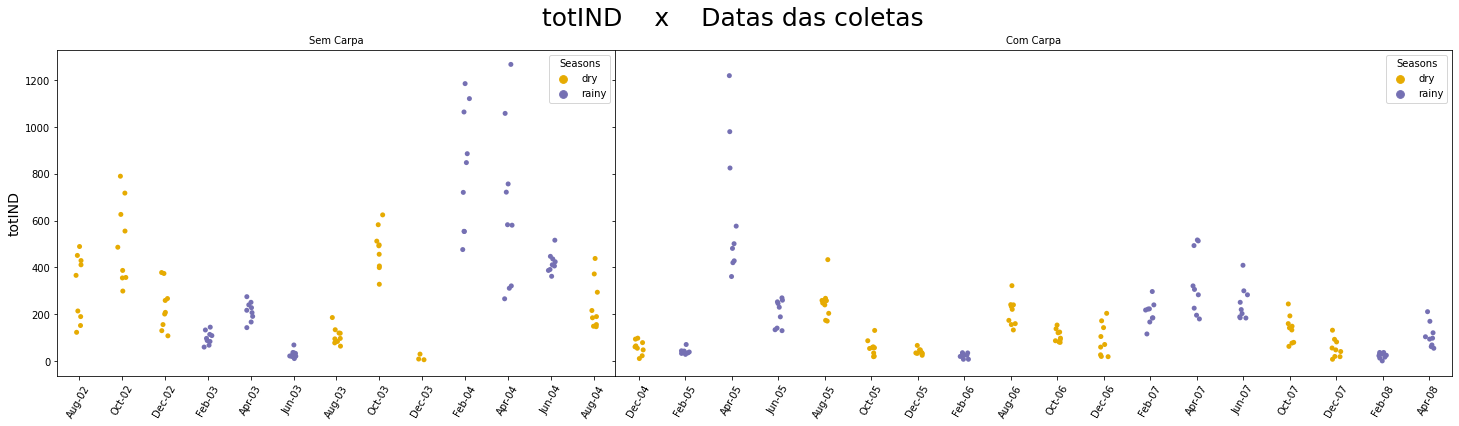

In [ ]:
graf_resp_data('totIND')
plt.savefig('totIND.png')

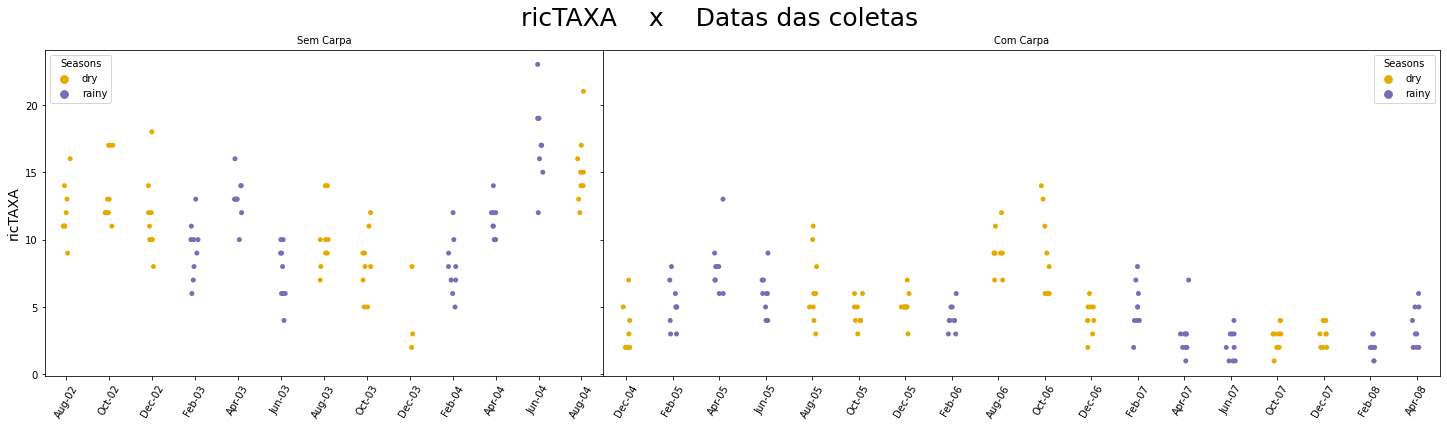

In [ ]:
graf_resp_data('ricTAXA')
plt.savefig('ricTAXA.png')

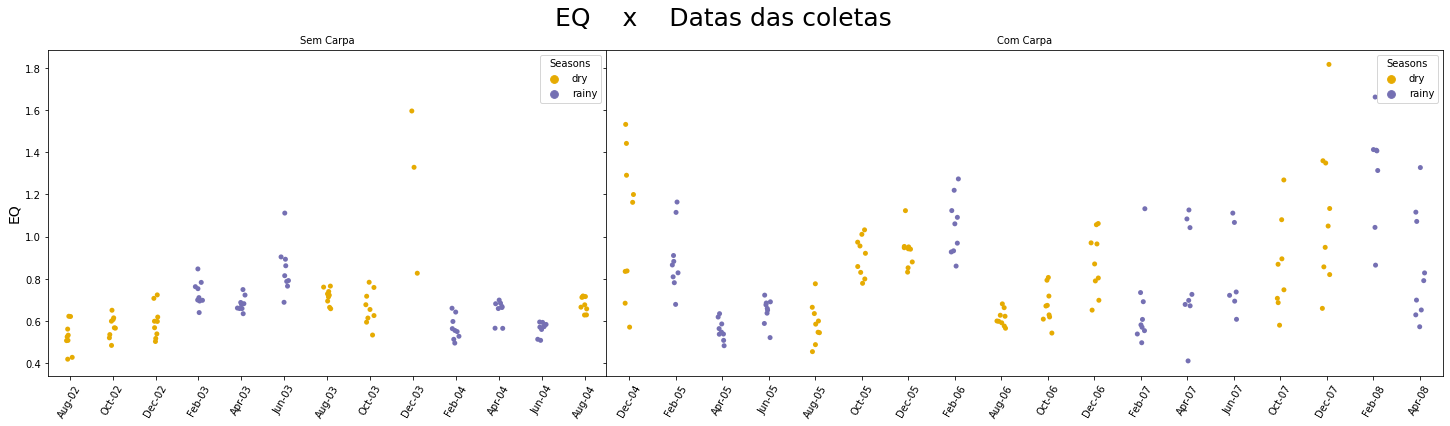

In [ ]:
graf_resp_data('EQ')
plt.savefig('EQ.png')

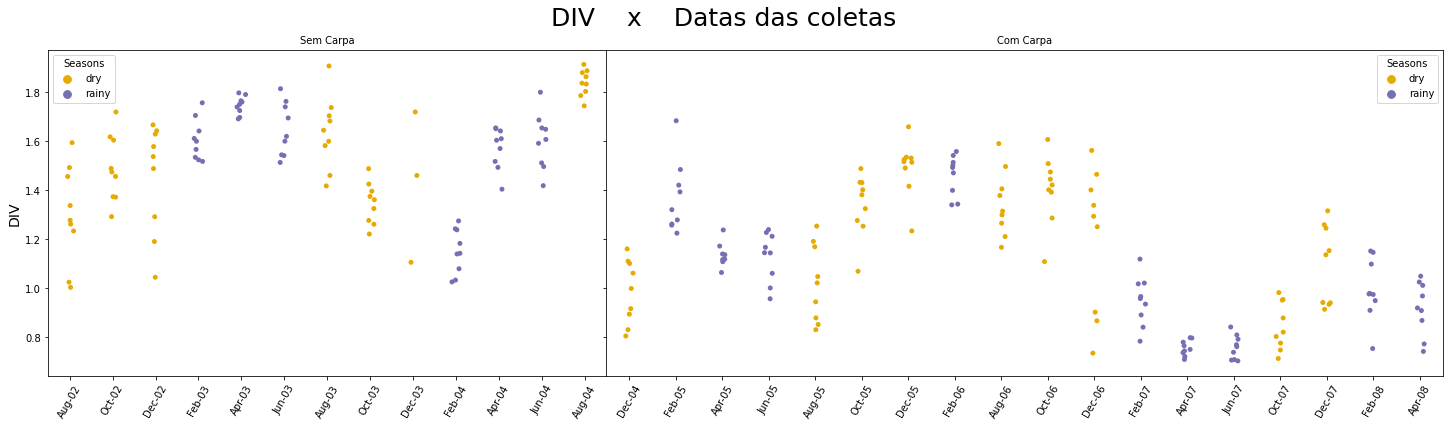

In [ ]:
graf_resp_data('DIV')
plt.savefig('DIV.png')

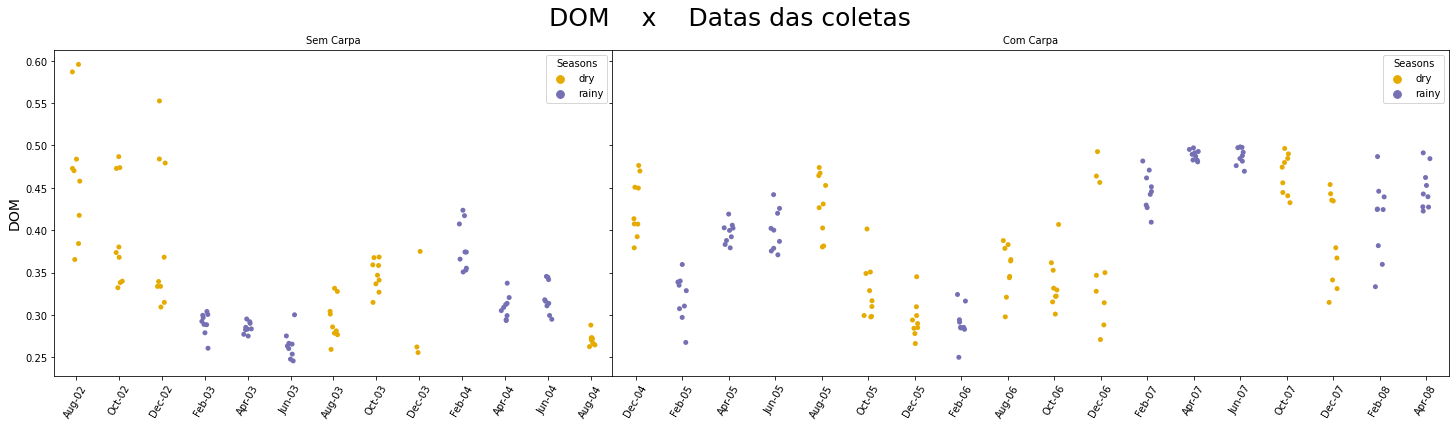

In [ ]:
graf_resp_data('DOM')
plt.savefig('DOM.png')

In [ ]:
#@title
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
seasons_numericos = label_encoder.fit_transform(dados.Seasons)
carpa_numericos = label_encoder.fit_transform(dados.carpa)

dados.Seasons = seasons_numericos
dados.carpa = carpa_numericos

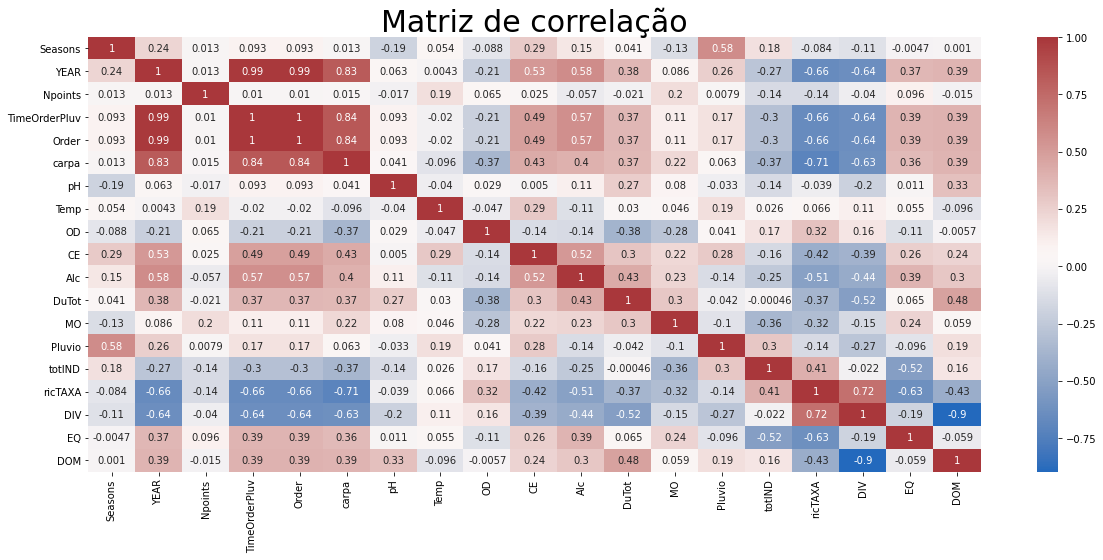

In [ ]:
ax = sns.heatmap(dados.corr(), cmap='vlag', annot=True)
ax.figure.set_size_inches(20, 8)
ax.set_title('Matriz de correlação', fontsize=30);


# matriz de correlação das variáveis

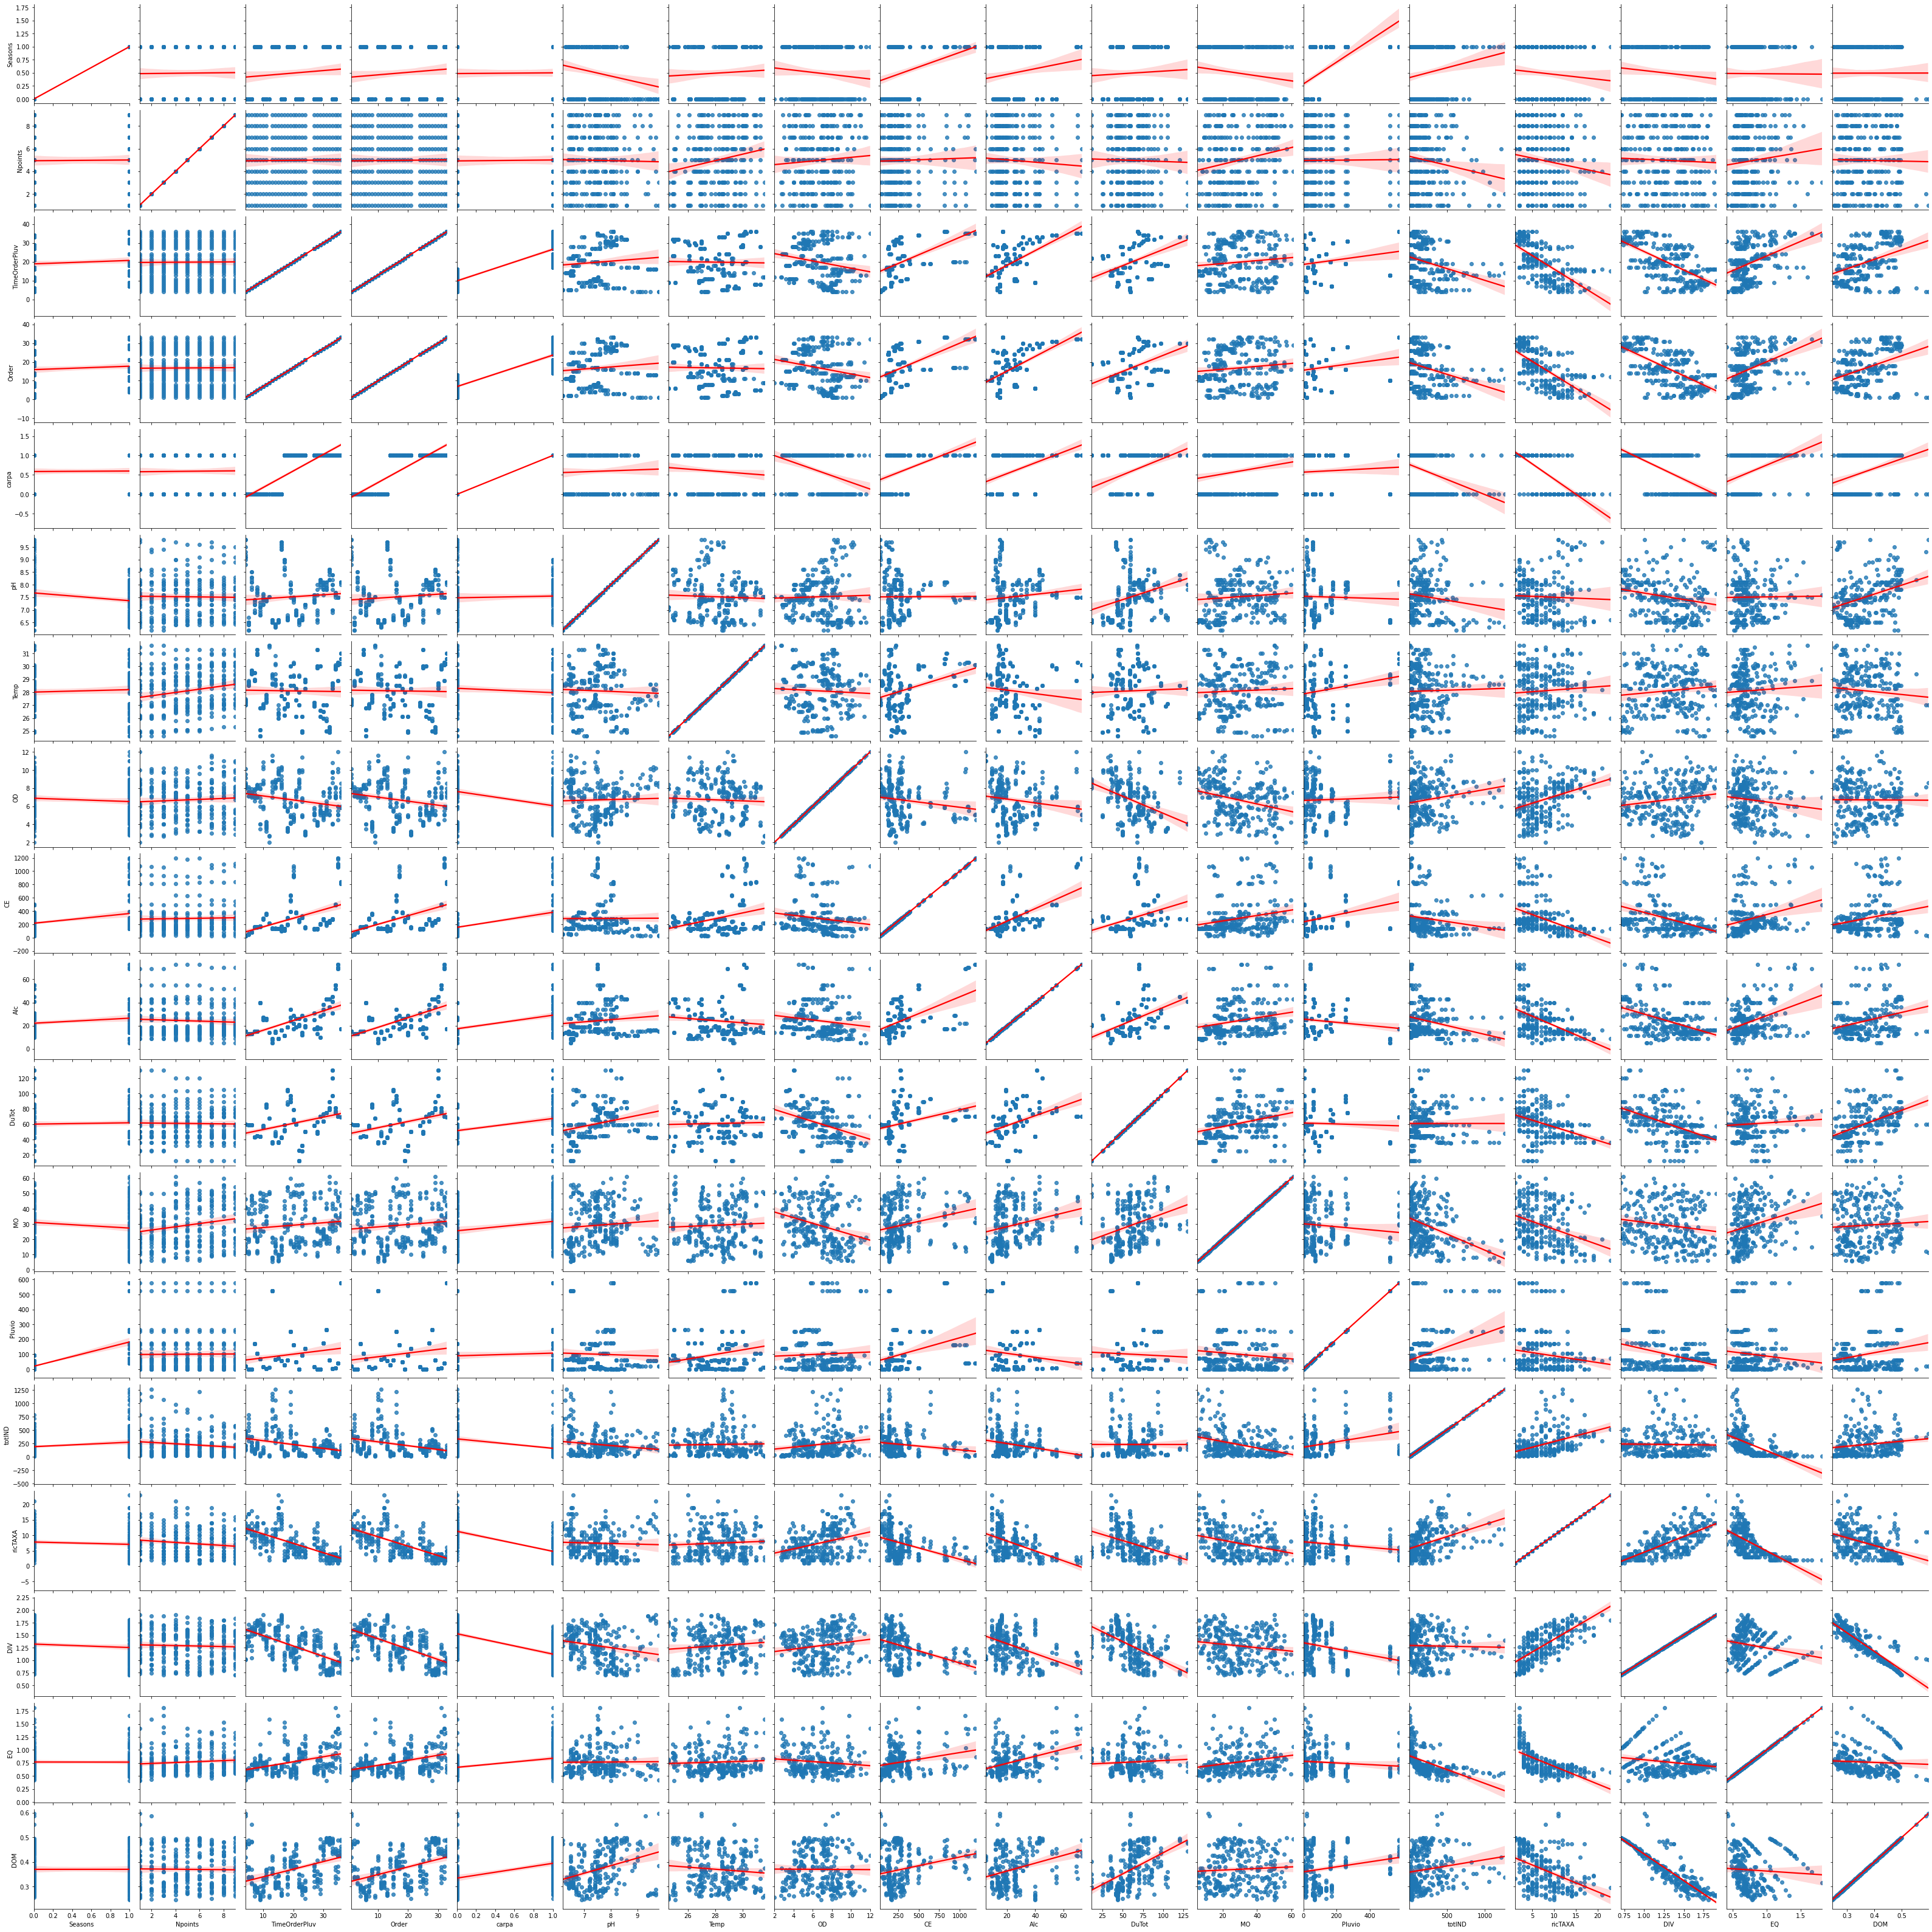

In [ ]:
sns.pairplot(data=dados[['Seasons', 'Datas', 'POINT', 'Replication', 'Npoints', 'TimeOrderPluv', 'Order', 'carpa', 'pH',
                         'Temp', 'OD', 'CE', 'Alc', 'DuTot', 'MO', 'Pluvio', 'totIND', 'ricTAXA', 'DIV', 'EQ', 'DOM']],
             diag_kind = None, kind='reg', plot_kws={'line_kws':{'color':'red'}});

In [ ]:
def var_visualizacao(variavel):
    #trocar as barras por pontos com desvio padrão
    ax = sns.barplot(x=dados.Datas, y=dados[f'{variavel}'])
    ax.figure.set_size_inches(25,5)

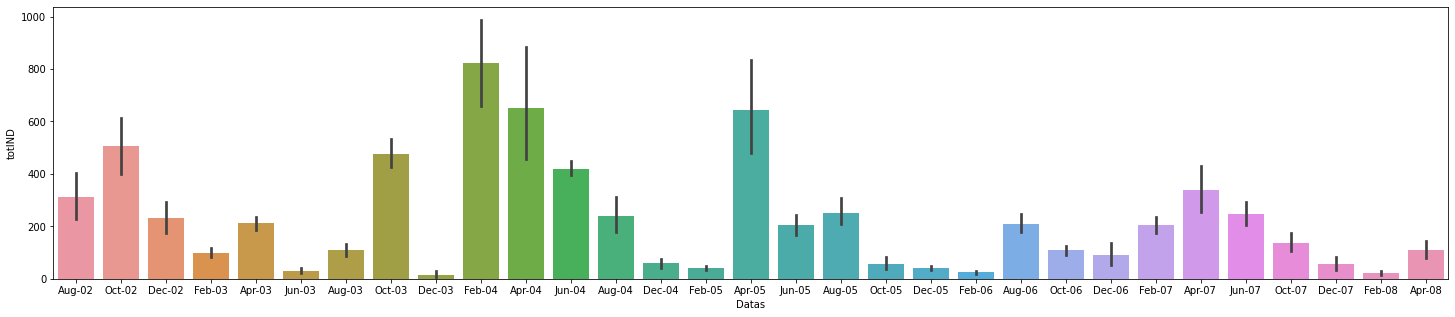

In [ ]:
var_visualizacao('totIND')

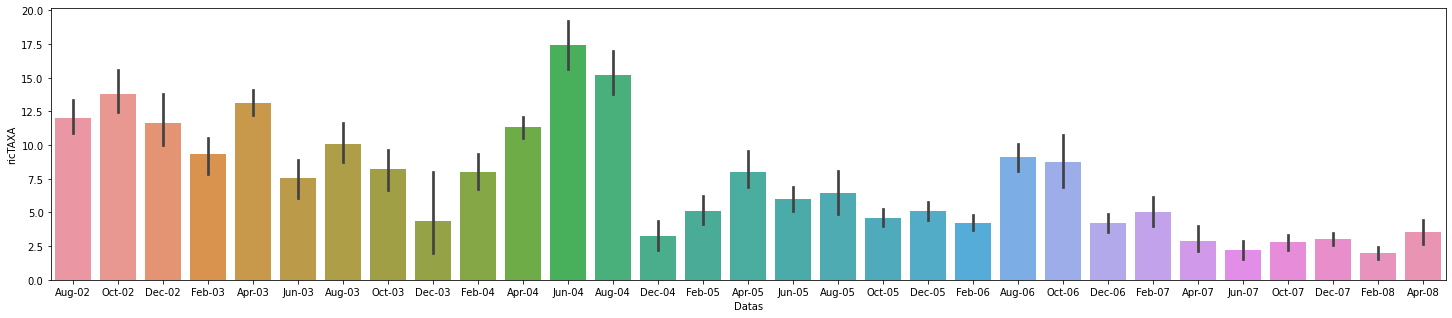

In [ ]:
var_visualizacao('ricTAXA')

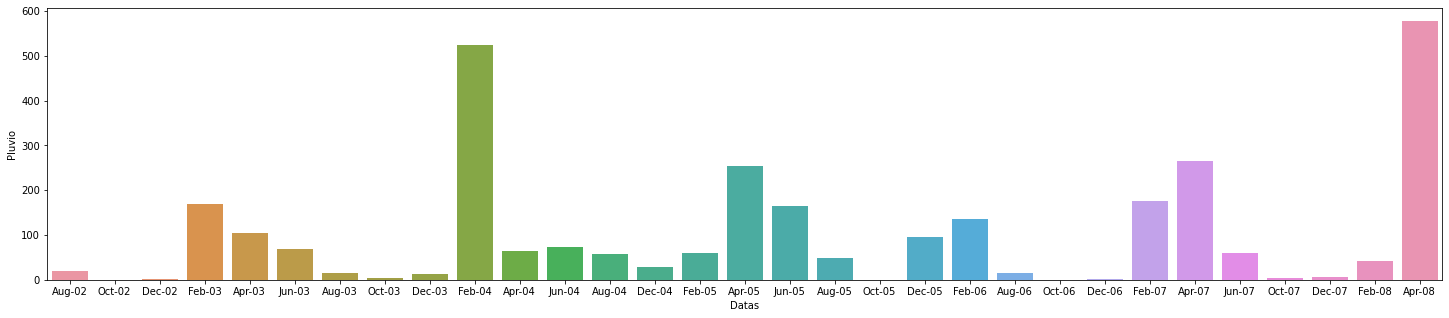

In [ ]:
var_visualizacao('Pluvio')

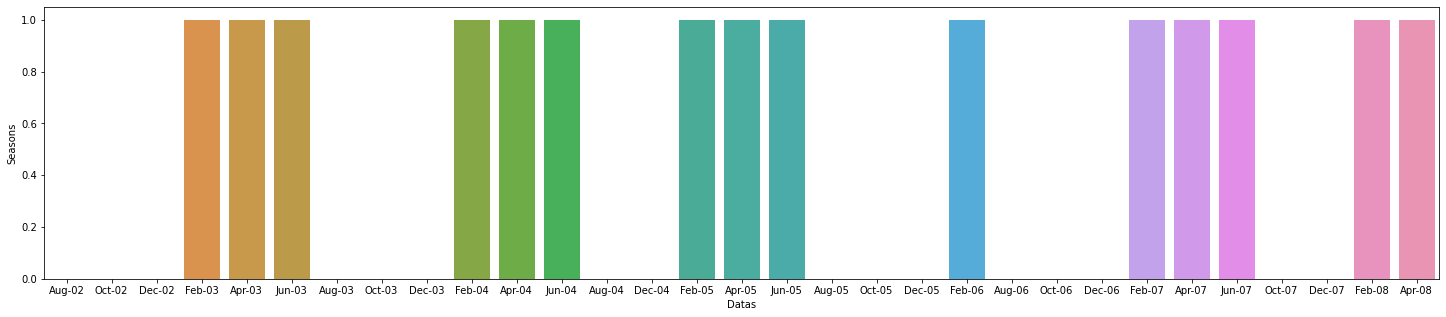

In [ ]:
var_visualizacao('Seasons')

In [39]:
def var_visualizacao(variavel):
    #trocar as barras por pontos com desvio padrão
    ax = sns.barplot(x=table.Datas, y=table[f'{variavel}'])
    ax.figure.set_size_inches(25,5)

In [40]:
var_visualizacao('totIND')

AttributeError: ignored

# Teste FacetGrid

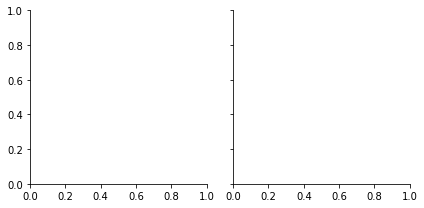

In [ ]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time")

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


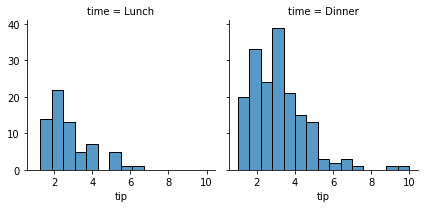

In [ ]:
g = sns.FacetGrid(tips, col="time")
g.map(sns.histplot, "tip");

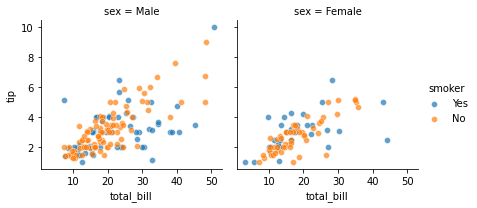

In [ ]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

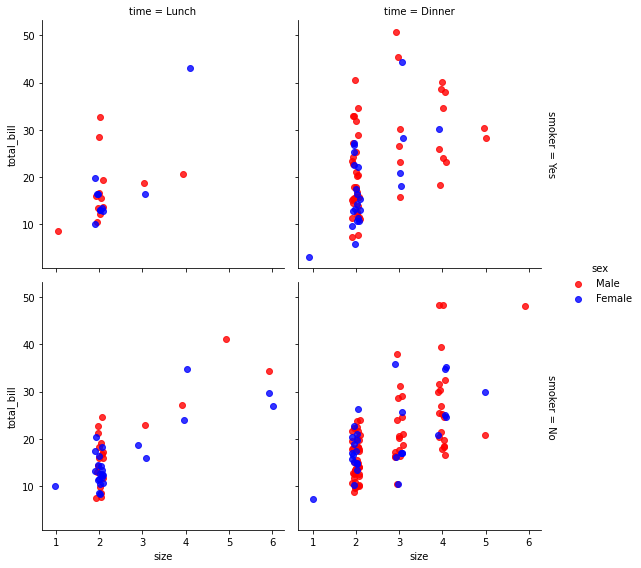

In [ ]:
g = sns.FacetGrid(tips, row="smoker", col="time", hue='sex', palette=dict(Male='r', Female='b'), margin_titles=True, height=4)
g.map(sns.regplot, "size", "total_bill", fit_reg=False, x_jitter=.1)
g.add_legend();

In [ ]:
dados.columns

Index(['Seasons', 'YEAR', 'MONTH', 'Datas', 'POINT', 'categoria',
       'Replication', 'Npoints', 'TimeOrderPluv', 'Order', 'carpa', 'pH',
       'Temp', 'OD', 'CE', 'Alc', 'DuTot', 'MO', 'Pluvio', 'totIND', 'ricTAXA',
       'DIV', 'EQ', 'DOM'],
      dtype='object')